In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import Image
%matplotlib inline


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


array([[[183, 212, 219],
        [183, 212, 219],
        [183, 212, 219],
        ...,
        [188, 209, 217],
        [187, 209, 215],
        [187, 209, 215]],

       [[183, 212, 219],
        [183, 212, 219],
        [183, 212, 219],
        ...,
        [188, 209, 217],
        [187, 209, 215],
        [187, 209, 215]],

       [[184, 212, 219],
        [184, 212, 219],
        [184, 212, 219],
        ...,
        [188, 209, 217],
        [187, 209, 215],
        [187, 209, 215]],

       ...,

       [[174, 169, 168],
        [173, 169, 168],
        [175, 170, 169],
        ...,
        [179, 184, 187],
        [177, 182, 185],
        [177, 182, 185]],

       [[174, 169, 168],
        [174, 169, 168],
        [175, 170, 169],
        ...,
        [179, 184, 187],
        [177, 182, 185],
        [175, 182, 185]],

       [[174, 169, 168],
        [174, 169, 168],
        [175, 170, 169],
        ...,
        [179, 184, 187],
        [177, 182, 185],
        [175, 182, 185]]

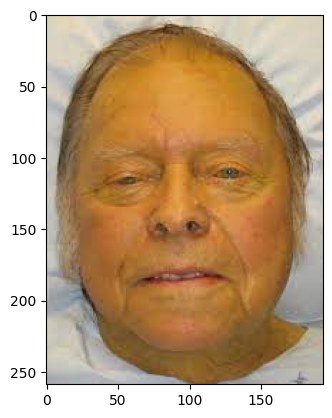

In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/Jaundice/Datasets/Test/Jaundice/1.jpg")
plt.imshow(img)
cv2.imread("/content/drive/MyDrive/Colab Notebooks/Jaundice/Datasets/Test/Jaundice/1.jpg")

In [ ]:
cv2.imread("/content/drive/MyDrive/Colab Notebooks/Jaundice/Datasets/Test/Jaundice/1.jpg").shape

(259, 194, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/259)
validation = ImageDataGenerator(rescale= 1/259)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Jaundice/Datasets/Train",
                                                                        target_size= (200,200),
                                                                        batch_size = 3,
                                                                        class_mode = 'binary')



Found 72 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape= (200,200,3)),
     tf.keras.layers.MaxPool2D(2,2),
     #
     tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     #
     tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     ##
     tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     ##
     tf.keras.layers.Flatten(),
     ##
     tf.keras.layers.Dense(1024, activation= 'relu'),
     ##
     tf.keras.layers.Dense(1, activation= 'sigmoid')
    ]
)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001),
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 10,
                      epochs = 10)

Epoch 1/10
10/10 [==============================] - 12s 995ms/step - loss: 0.6649 - accuracy: 0.6333
Epoch 2/10
10/10 [==============================] - 6s 580ms/step - loss: 0.6415 - accuracy: 0.7000
Epoch 3/10
10/10 [==============================] - 4s 388ms/step - loss: 0.5926 - accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 5s 514ms/step - loss: 0.6149 - accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 5s 444ms/step - loss: 0.4829 - accuracy: 0.7667
Epoch 6/10
10/10 [==============================] - 4s 381ms/step - loss: 0.5190 - accuracy: 0.7333
Epoch 7/10
10/10 [==============================] - 6s 548ms/step - loss: 0.4152 - accuracy: 0.7333
Epoch 8/10
10/10 [==============================] - 4s 387ms/step - loss: 0.3865 - accuracy: 0.8667
Epoch 9/10
10/10 [==============================] - 6s 568ms/step - loss: 0.2568 - accuracy: 0.9667
Epoch 10/10
10/10 [==============================] - 4s 388ms/step - loss: 0.2741 - accuracy: 0.900